# THE EFFECT OF PREPARATION ON STUDENTS PERFORMANCE

# About The Data

# Read Data To DataFrame

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import python libraries

In [216]:
data = pd.read_csv("StudentsPerformance.csv") # read csv file to dataframe

In [217]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [218]:
data.shape

(1000, 8)

In [219]:
data.describe()  # quick statistical check

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [220]:
data.isnull() # checking for null values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [221]:
data.isnull().sum() # confirming if there is any null value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Exploratory Data Analysis

In [222]:
data.columns # viewing the data column to check for columns that will be needed for analysis

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [243]:
students_data  = data[['math score', 'writing score', 'reading score', 'gender', 'test preparation course', 
                       'lunch', 'race/ethnicity']]

# output columns that will be needed for analysis

In [224]:
students_data

,math score,writing score,reading score,gender,test preparation course,lunch,race/ethnicity
0,72,74,72,female,none,standard,group B
1,69,88,90,female,completed,standard,group C
2,90,93,95,female,none,standard,group B
3,47,44,57,male,none,free/reduced,group A
4,76,75,78,male,none,standard,group C
...,...,...,...,...,...,...,...
995,88,95,99,female,completed,standard,group E
996,62,55,55,male,none,free/reduced,group C
997,59,65,71,female,completed,free/reduced,group C
998,68,77,78,female,completed,standard,group D


In [225]:
scores_data = students_data[['math score', 'writing score', 'reading score']]

scores_data

,math score,writing score,reading score
0,72,74,72
1,69,88,90
2,90,93,95
3,47,44,57
4,76,75,78
...,...,...,...
995,88,95,99
996,62,55,55
997,59,65,71
998,68,77,78


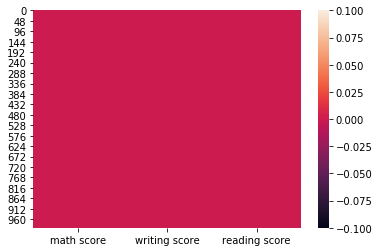

In [226]:
sns.heatmap(scores_data.isnull()) # using heatmap to show if there is any missing value

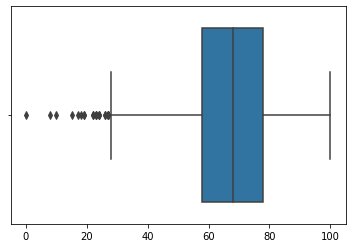

In [227]:
sns.boxplot(scores_data) # Boxplot

# Univariate analysis

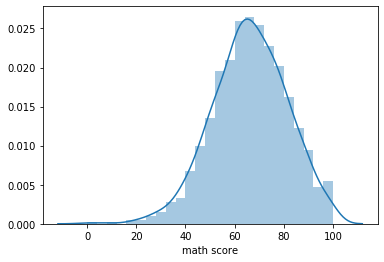

In [228]:
sns.distplot(scores_data['math score'])

In [229]:
# the graph above shows thatmost of the students scored between 60 to 80 in maths

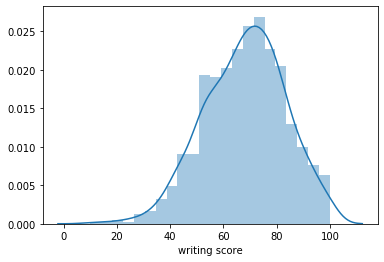

In [230]:
sns.distplot(scores_data['writing score'])

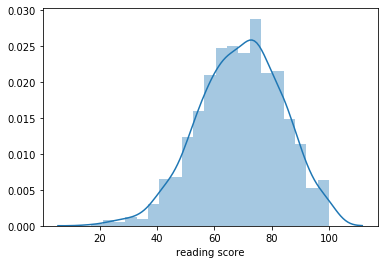

In [231]:
sns.distplot(scores_data['reading score'])

# Bivariate analysis

In [232]:
bi_data = ['math score', 'writing score', 'reading score']
bi_data

['math score', 'writing score', 'reading score']

In [233]:
average = students_data.groupby('gender')[bi_data].mean()
average

,math score,writing score,reading score
gender,,,
female,63.633205,72.467181,72.608108
male,68.728216,63.311203,65.473029


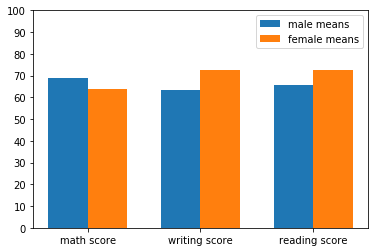

In [234]:
indx = np.arange(len(bi_data))
indx

score_label = np.arange(0, 110, 10)
male_means =list(average.T['male'])
female_means =list(average.T['female'])
average

bar_width = 0.35

fig, ax = plt.subplots()
bar_male = ax.bar(indx-bar_width/2, male_means, bar_width, label = 'male means')
bar_female = ax.bar(indx+bar_width/2, female_means, bar_width, label = 'female means')

ax.set_xticks(indx)
ax.set_xticklabels(average)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()

plt.show()


In [235]:
average_test = students_data.groupby('test preparation course')[bi_data].mean()
average_test

,math score,writing score,reading score
test preparation course,,,
completed,69.695531,74.418994,73.893855
none,64.077882,64.504673,66.534268


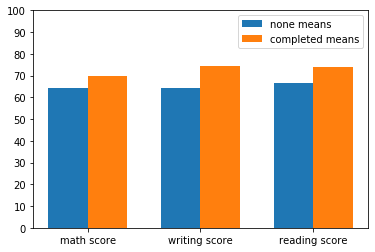

In [236]:
indx = np.arange(len(bi_data))
indx

score_label = np.arange(0, 110, 10)
none_means =list(average_test.T['none'])
completed_means =list(average_test.T['completed'])
average_test

bar_width = 0.35

fig, ax = plt.subplots()
bar_none = ax.bar(indx-bar_width/2, none_means, bar_width, label = 'none means')
bar_completed = ax.bar(indx+bar_width/2, completed_means, bar_width, label = 'completed means')

ax.set_xticks(indx)
ax.set_xticklabels(average_test)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()

plt.show()


In [237]:
average_lunch = students_data.groupby('lunch')[bi_data].mean()
average_lunch

,math score,writing score,reading score
lunch,,,
free/reduced,58.921127,63.022535,64.653521
standard,70.034109,70.823256,71.654264


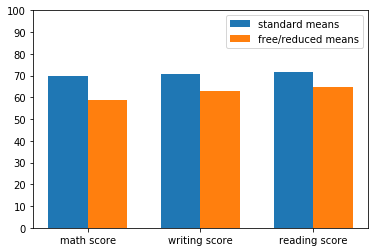

In [238]:
indx = np.arange(len(bi_data))
indx

score_label = np.arange(0, 110, 10)
standard_means =list(average_lunch.T['standard'])
free_means =list(average_lunch.T['free/reduced'])
average_lunch

bar_width = 0.35

fig, ax = plt.subplots()
bar_male = ax.bar(indx-bar_width/2, standard_means, bar_width, label = 'standard means')
bar_female = ax.bar(indx+bar_width/2, free_means, bar_width, label = 'free/reduced means')

ax.set_xticks(indx)
ax.set_xticklabels(average_lunch)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

ax.legend()

plt.show()


In [239]:
average_race = students_data.groupby('race/ethnicity')[bi_data].mean()
average_race

,math score,writing score,reading score
race/ethnicity,,,
group A,61.629213,62.674157,64.674157
group B,63.452632,65.600000,67.352632
group C,64.463950,67.827586,69.103448
group D,67.362595,70.145038,70.030534
group E,73.821429,71.407143,73.028571


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

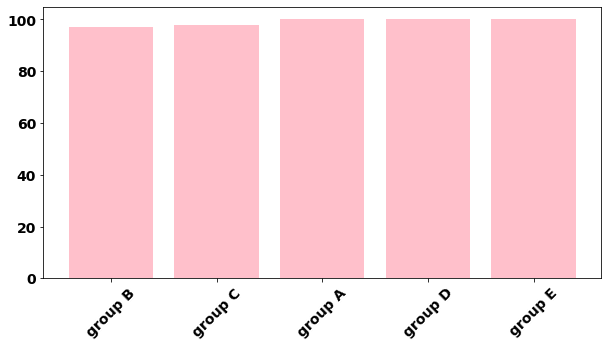

In [244]:
plt.figure(figsize=(10,5))
plt.bar(x=students_data['race/ethnicity'], height = students_data['math score'], color = 'pink')
plt.xticks(rotation=45, fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

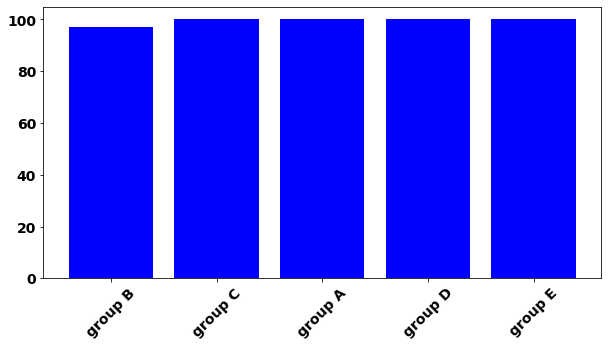

In [241]:
plt.figure(figsize=(10,5))
plt.bar(x=students_data['race/ethnicity'], height = students_data['reading score'], color = 'blue')
plt.xticks(rotation=45, fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

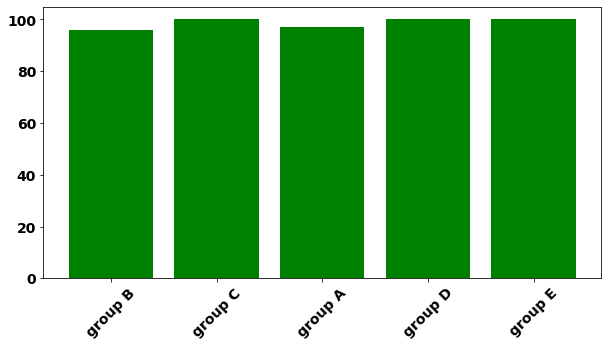

In [242]:
plt.figure(figsize=(10,5))
plt.bar(x=students_data['race/ethnicity'], height = students_data['writing score'], color = 'green')
plt.xticks(rotation=45, fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)